# Reaction Time Analysis

## Description
We have conducted a study to measure the reaction time under different conditions. The first condition was that the participants had to react to a visual stimulus, i.e. whenever a green circle appeared, they had to press the space bar. In the second condition, the circle contained a random number between one and three and the participant had to press the space bar only if it was the previously randomly determined correct number. With this we want to measure the influence of mental demand on reaction time. Our hypothesis is that reaction time will increase when participants are mentally challenged.

The study was conceptualised as a within-subject design with 10 repetitions for each condition. The dependent variable is the reaction time which was measured in milliseconds via key logging. The independent variables are the visual stimulus (green circle) and the task for the mental demand (green circle with number). 

In this study, a Tuxedo notebook (InfinityBook Pro 14 v5) with a built-in keyboard was used.

For the measurement, the participant id, the condition, the reaction time and the timestamp were logged. To document incorrect entries,  we saved whether the correct key was pressed, the value of the pressed key, whether a circle was shown and whether the key was pressed when the circle with the correct number appeared.
The boolean values were furthermore summarized in a column called "is_correct_reaction" for easier evaluation. We also recorded the number of circles displayed, since this varies with the second condition due to the random selection.

Due to the current situation, we only had three participants (two female, one male) who each performed the study twice. Two participants were media informatics students and one a software developer. The ages of the participants were 22, 25, and 38.

### Install and import of all relevant libraries

In [56]:
!pip3 install pingouin

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import pingouin as pg
from matplotlib import pyplot as plt

### Load the csv tables

In [2]:
raw_data_single_stimulus_1 = pd.read_csv('./id_1_trial_single_stimulus.csv')
raw_data_single_stimulus_2 = pd.read_csv('./id_2_trial_single_stimulus.csv')
raw_data_single_stimulus_3 = pd.read_csv('./id_3_trial_single_stimulus.csv')
raw_data_single_stimulus_4 = pd.read_csv('./id_4_trial_single_stimulus.csv')
raw_data_single_stimulus_5 = pd.read_csv('./id_5_trial_single_stimulus.csv')
raw_data_single_stimulus_6 = pd.read_csv('./id_6_trial_single_stimulus.csv')

raw_data_mental_demand_1 = pd.read_csv('./id_1_trial_mental_demand.csv')
raw_data_mental_demand_2 = pd.read_csv('./id_2_trial_mental_demand.csv')
raw_data_mental_demand_3 = pd.read_csv('./id_3_trial_mental_demand.csv')
raw_data_mental_demand_4 = pd.read_csv('./id_4_trial_mental_demand.csv')
raw_data_mental_demand_5 = pd.read_csv('./id_5_trial_mental_demand.csv')
raw_data_mental_demand_6 = pd.read_csv('./id_6_trial_mental_demand.csv')

### Combine the individual tables of the participants and save them

In [3]:
reaction_time_results_single_stimulus = pd.concat([raw_data_single_stimulus_1, 
                                      raw_data_single_stimulus_2,
                                      raw_data_single_stimulus_3,
                                      raw_data_single_stimulus_4,
                                      raw_data_single_stimulus_5,
                                      raw_data_single_stimulus_6])

reaction_time_results_single_stimulus.to_csv('reaction_time_results_single_stimulus.csv', index=False)

In [4]:
reaction_time_results_mental_demand = pd.concat([raw_data_mental_demand_1,
                                    raw_data_mental_demand_2,
                                    raw_data_mental_demand_3,
                                    raw_data_mental_demand_4,
                                    raw_data_mental_demand_5,
                                    raw_data_mental_demand_6])

reaction_time_results_mental_demand.to_csv('reaction_time_results_mental_demand.csv', index=False)

In [5]:
reaction_time_results = pd.concat([reaction_time_results_single_stimulus, reaction_time_results_mental_demand])
reaction_time_results.to_csv('reaction_time_results.csv', index=False)
reaction_time_results

,participant_id,condition,shown_stimulus,pressed_key,is_correct_key,reaction_time_in_ms,timestamp,is_circle_shown,number_of_circles,is_correct_number,is_correct_reaction
0,1,single_stimulus,circle appears,32,True,432.252,2021-05-04 15:11:22.853987,True,1,NaN,True
1,1,single_stimulus,circle appears,32,True,231.910,2021-05-04 15:11:26.655145,True,2,NaN,True
2,1,single_stimulus,circle appears,32,True,262.485,2021-05-04 15:11:31.686080,True,3,NaN,True
3,1,single_stimulus,circle appears,32,True,253.845,2021-05-04 15:11:36.676911,True,4,NaN,True
4,1,single_stimulus,circle appears,32,True,324.973,2021-05-04 15:11:40.998591,True,5,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
6,6,mental_demand,circle with number 1,32,True,439.719,2021-05-04 17:16:58.866047,True,20,1.0,True
7,6,mental_demand,circle with number 1,32,True,370.780,2021-05-04 17:17:07.794690,True,22,1.0,True
8,6,mental_demand,circle with number 1,32,True,450.018,2021-05-04 17:17:27.870110,True,26,1.0,True
9,6,mental_demand,circle with number 1,32,True,467.275,2021-05-04 17:17:30.513868,True,27,1.0,True


### Filter the data with relevant columns for analysis of reaction time and save the result

In [6]:
filtered_data = reaction_time_results[['participant_id', 'condition', 'reaction_time_in_ms', 'is_correct_reaction']]
filtered_data.to_csv('filtered_data.csv', index=False)

In [7]:
filtered_data

,participant_id,condition,reaction_time_in_ms,is_correct_reaction
0,1,single_stimulus,432.252,True
1,1,single_stimulus,231.910,True
2,1,single_stimulus,262.485,True
3,1,single_stimulus,253.845,True
4,1,single_stimulus,324.973,True
...,...,...,...,...
6,6,mental_demand,439.719,True
7,6,mental_demand,370.780,True
8,6,mental_demand,450.018,True
9,6,mental_demand,467.275,True


### Filter the data so that only the reaction times when the user reacted correctly are included,
i.e. when a circle was shown, the correct key was pressed and the circle had the correct number when the user reacted and save the result.

In [8]:
correct_reaction_times = filtered_data[filtered_data['is_correct_reaction']]
correct_reaction_times = correct_reaction_times[['participant_id', 'condition', 'reaction_time_in_ms']]
correct_reaction_times.to_csv('correct_reaction_times.csv', index=False)

In [9]:
correct_reaction_times

,participant_id,condition,reaction_time_in_ms
0,1,single_stimulus,432.252
1,1,single_stimulus,231.910
2,1,single_stimulus,262.485
3,1,single_stimulus,253.845
4,1,single_stimulus,324.973
...,...,...,...
6,6,mental_demand,439.719
7,6,mental_demand,370.780
8,6,mental_demand,450.018
9,6,mental_demand,467.275


### Size of the data frames

In [10]:
len(reaction_time_results)

124

In [11]:
len(reaction_time_results_single_stimulus)

61

In [12]:
len(reaction_time_results_mental_demand)

63

In [13]:
len(correct_reaction_times)

120

### Statistic for all tables

In [14]:
reaction_time_results.describe()

,participant_id,pressed_key,reaction_time_in_ms,number_of_circles,is_correct_number
count,124.000000,124.0,123.000000,124.000000,63.000000
mean,3.516129,32.0,375.521789,14.169355,0.952381
std,1.722561,0.0,79.701750,10.769365,0.214669
min,1.000000,32.0,231.910000,1.000000,0.000000
25%,2.000000,32.0,315.928000,6.000000,1.000000
50%,4.000000,32.0,368.239000,11.000000,1.000000
75%,5.000000,32.0,433.165500,21.250000,1.000000
max,6.000000,32.0,656.646000,51.000000,1.000000


In [15]:
correct_reaction_times.describe()

,participant_id,reaction_time_in_ms
count,120.000000,120.000000
mean,3.500000,375.945175
std,1.714986,80.489584
min,1.000000,231.910000
25%,2.000000,315.204750
50%,3.500000,369.173000
75%,5.000000,434.521000
max,6.000000,656.646000


In [16]:
correct_reaction_times[correct_reaction_times['condition'] == 'single_stimulus'].describe()

,participant_id,reaction_time_in_ms
count,60.000000,60.000000
mean,3.500000,318.699450
std,1.722237,49.990213
min,1.000000,231.910000
25%,2.000000,290.831750
50%,3.500000,314.685500
75%,5.000000,335.233750
max,6.000000,513.883000


In [17]:
correct_reaction_times[correct_reaction_times['condition'] == 'mental_demand'].describe()

,participant_id,reaction_time_in_ms
count,60.000000,60.000000
mean,3.500000,433.190900
std,1.722237,62.471578
min,1.000000,336.568000
25%,2.000000,389.066000
50%,3.500000,427.969500
75%,5.000000,463.597500
max,6.000000,656.646000


## Scatter plots

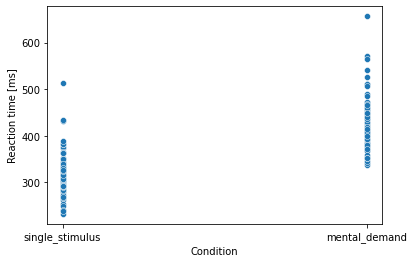

In [18]:
scatter_plot = sns.scatterplot(
    data = correct_reaction_times,
    x = "condition",
    y = "reaction_time_in_ms",
    )
scatter_plot.set(xlabel = "Condition", ylabel = "Reaction time [ms]")
plt.show()

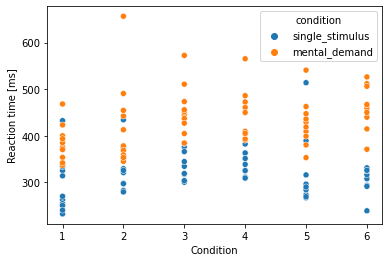

In [19]:
scatter_plot_grouped = sns.scatterplot(
    data = correct_reaction_times,
    x = "participant_id",
    y = "reaction_time_in_ms",
    hue = "condition",
    )
scatter_plot_grouped.set(xlabel = "Condition", ylabel = "Reaction time [ms]")
plt.show()

## Swarm plots

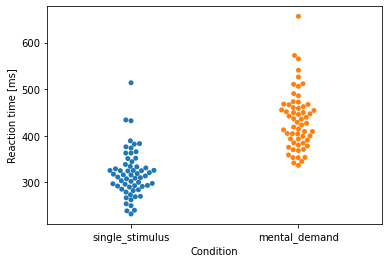

In [20]:
swarm_plot = sns.swarmplot(
    data = correct_reaction_times,
    y = "reaction_time_in_ms",
    x = "condition",
)
swarm_plot.set(xlabel = "Condition", ylabel = "Reaction time [ms]")

plt.show()

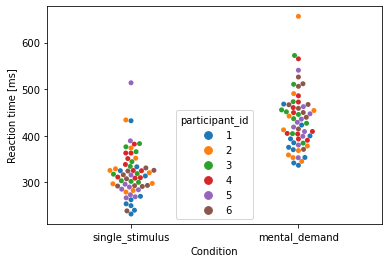

In [21]:
swarm_plot_grouped = sns.swarmplot(
    data = correct_reaction_times,
    y = "reaction_time_in_ms",
    x = "condition",
    hue = "participant_id",
)
swarm_plot_grouped.set(xlabel = "Condition", ylabel = "Reaction time [ms]")

plt.show()

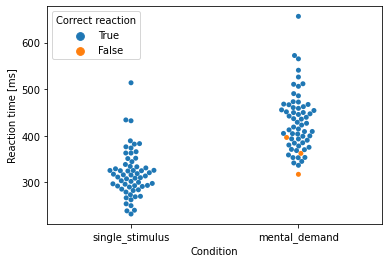

In [22]:
plot_correct_reaction = sns.swarmplot(
    data = reaction_time_results,
    y = "reaction_time_in_ms",
    x = "condition",
    hue = "is_correct_reaction",
    hue_order = [True, False]
)
plot_correct_reaction.set(xlabel = "Condition", ylabel = "Reaction time [ms]")
plot_correct_reaction.legend(title = "Correct reaction")

plt.show()

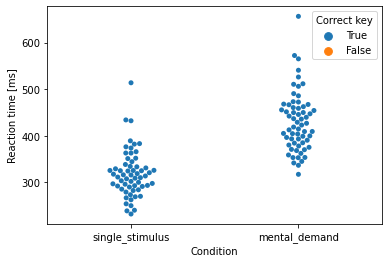

In [23]:
plot_correct_key = sns.swarmplot(
    data = reaction_time_results,
    y = "reaction_time_in_ms",
    x = "condition",
    hue = "is_correct_key",
    hue_order = [True, False]
)
plot_correct_key.set(xlabel = "Condition", ylabel = "Reaction time [ms]")
plot_correct_key.legend(title = "Correct key")

plt.show()

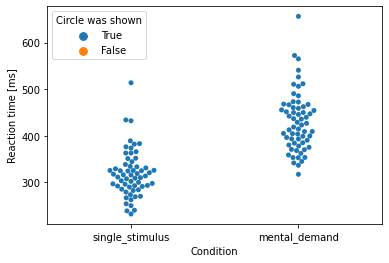

In [39]:
plot_circle_shown = sns.swarmplot(
    data = reaction_time_results,
    y = "reaction_time_in_ms",
    x = "condition",
    hue = "is_circle_shown",
    hue_order = [True, False]
)
plot_circle_shown.set(xlabel = "Condition", ylabel = "Reaction time [ms]")
plot_circle_shown.legend(title = "Circle was shown")

plt.show()

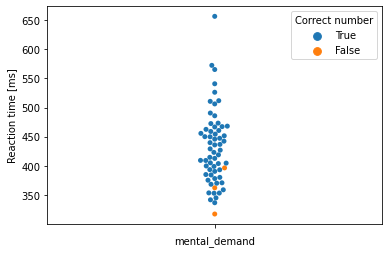

In [28]:
plot_correct_number = sns.swarmplot(
    data = reaction_time_results[(reaction_time_results['condition'] == 'mental_demand')],
    y = "reaction_time_in_ms",
    x = "condition",
    hue = "is_correct_number",
    hue_order = [True, False]
)
plot_correct_number.set(xlabel = "mental_demand", ylabel = "Reaction time [ms]", xticklabels = [])
plot_correct_number.legend(title = "Correct number")

plt.show()

## Boxplot for reaction time per condition

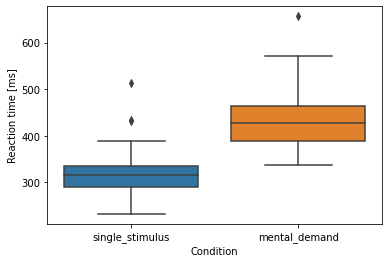

In [29]:
box_plot = sns.boxplot(
    data = correct_reaction_times,
    x = "condition",
    y = "reaction_time_in_ms"
)

box_plot.set(xlabel = "Condition", ylabel = "Reaction time [ms]")

plt.show()

## T-tests

In [30]:
from scipy.stats import ttest_ind, linregress

In [31]:
x1 = correct_reaction_times[correct_reaction_times['condition'] == 'single_stimulus']['reaction_time_in_ms']
x2 = correct_reaction_times[correct_reaction_times['condition'] == 'mental_demand']['reaction_time_in_ms']

__T-test with scipy library.__

In [32]:
ttest_ind(x1, x2)

Ttest_indResult(statistic=-11.08409813861553, pvalue=5.3096369986775634e-20)

__T-test with pingouin library.__

In [33]:
pg.anova(data=correct_reaction_times, dv="reaction_time_in_ms", between="condition", ss_type=2,detailed=True, effsize="np2")

,Source,SS,DF,MS,F,p-unc,np2
0,condition,393248.763693,1,393248.763693,122.857232,5.309637e-20,0.510083
1,Within,377701.446888,118,3200.859719,NaN,NaN,NaN


__Test for homogeneity of variance__

In [34]:
pg.homoscedasticity(data=correct_reaction_times, dv="reaction_time_in_ms", group="condition", method="bartlett")

,T,pval,equal_var
bartlett,2.882592,0.089542,True


__Test for normal distribution.__

In [35]:
pg.normality(data=correct_reaction_times, dv="reaction_time_in_ms", group="condition")

,W,pval,normal
single_stimulus,0.926667,0.001438,False
mental_demand,0.943323,0.007647,False


__The variance of the data is homogeneous, but the data are not normally distributed, so a Welch-Anova test is performed.__

In [36]:
pg.welch_anova(data=correct_reaction_times, dv="reaction_time_in_ms", between="condition")

,Source,ddof1,ddof2,F,p-unc,np2
0,condition,1,112.587106,122.857232,9.476237e-20,0.510083


## Results

For "single stimulus", the average reaction time is slightly lower (M = 318.70 ms, SD = 49.99, n=60) than for "mental demand" (M = 433.19, SD = 62.47, n=60). The boxplot visualises these results. Moreover, in the plot we can identify two outliers for "single stimulus" and one for "mental demand".

A t-test and Welch-Anova-test show that the differences between the conditions are over significant (t(1) = 122.86, p < 0,001). According to Cohen (2013) defining .01 as a small effect, .06 as a medium effect and .14 as a large effect, we have a small effect ($\eta²$ = 0.51). This implies that there are small differences regarding the reaction time between the two conditions and the hypothesis is confirmed.


__Source:__ Cohen, J. (2013). Statistical power analysis for the behavioral sciences. Academic press.

## Discussion
The results must be viewed critically because the number of participants was very low. In addition, due to the current situation, each participant did the study twice, which might have an influence on the variance of the data.

With "mental demand", the circles were each given a randomly generated number from 1 to 3 and the user was only allowed to press the space bar if the correct number appeared. This meant that the number of circles that appeared varied greatly from run to run, as the random number generator was not very balanced. The partly great number of displayed circles increased the duration of the study so that fatigue effects cannot be excluded. In a further study, the random number generator should be improved and the design changed to reduce fatigue effects.
